# Project using KNN

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loadinf the data

In [2]:
df = pd.read_csv('KNN_Data.csv')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna() #to get rid of null values

### EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

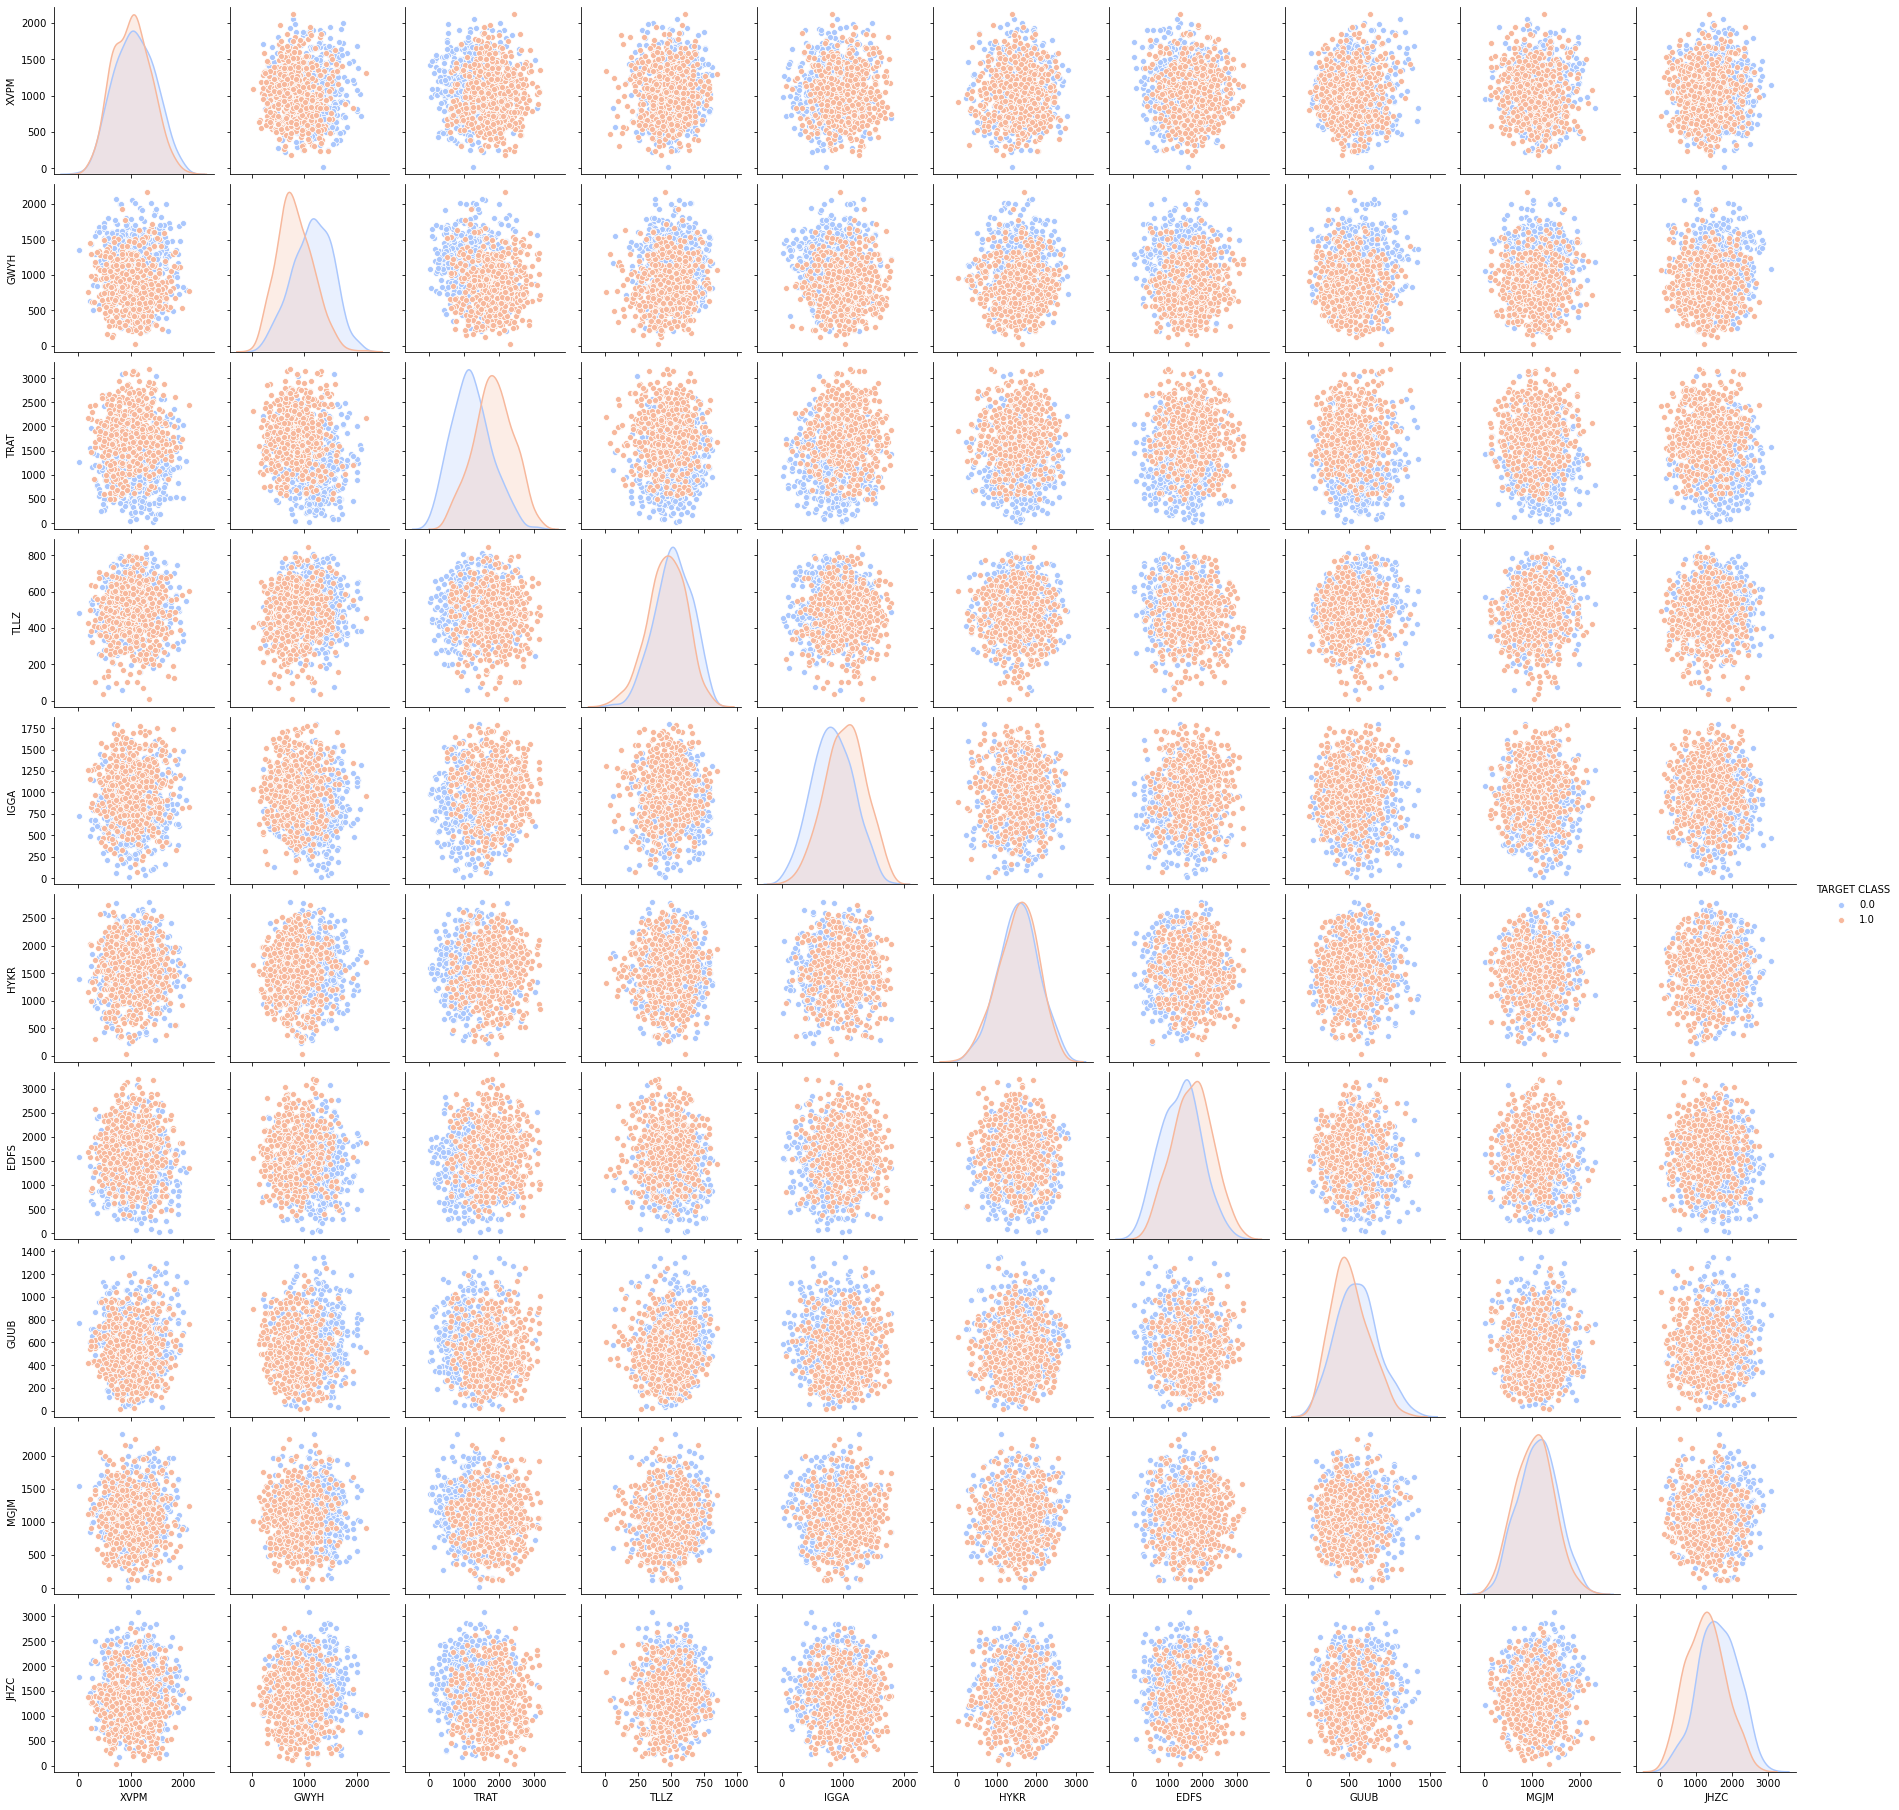

In [5]:


# Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')



### Standardizing the Variables

In [6]:
#importing StandardScaler from Scikit learn
from sklearn.preprocessing import StandardScaler

In [7]:


# Create a StandardScaler() object called scaler.
scaler = StandardScaler()

In [8]:
# fitting scaler to the features
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:


# Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


###   Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:


X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)



### Using KNN algorithm

In [13]:
# Import KNN classifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Create a KNN model instance with n_neighbors=1

knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
# fitting this KNN model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)


### Predictions and Evaluations

In [16]:
# Using the predict method to predict values using our KNN model and X_test.
pred = knn.predict(X_test)

In [17]:
# Creating a confusion matrix and classification report.


from sklearn.metrics import classification_report,confusion_matrix



In [18]:
print(confusion_matrix(y_test,pred))

[[108  48]
 [ 31 113]]


In [19]:


print(classification_report(y_test,pred))



              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       156
         1.0       0.70      0.78      0.74       144

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



### Choosing a K value

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [20]:
# using the elbow method to pick a good K Value


error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))





Now create the following plot using the information from your for loop.


Text(0, 0.5, 'Error Rate')

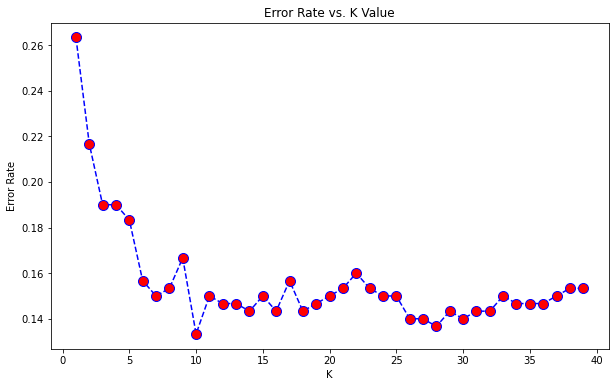

In [21]:


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



### Retrain with new K Value

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [22]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[128  28]
 [ 14 130]]


              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       156
         1.0       0.82      0.90      0.86       144

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

